# EvolvePy Example 2 - Elitism

In this example, we will show how to create a generator with elitism, to to prevent losing the best individual. 

- Defining a generator with complex sequence
- Use elitism

In [1]:
import evolvepy

import numpy as np
from matplotlib import pyplot as plt

# Fitness functions

We will use the same function as the previous example (see Simple EA example).

In [2]:
from evolvepy.evaluator import FunctionEvaluator

def fitness_function(individuals):
    individual = individuals[0]["chr0"][0] 

    score = 0

    if individual < 500:
        score = individual
    elif individual < 1000:
        score = 1000 - individual
    elif individual < 2000:
        score = individual - 1000
    else:
        score = 3000 - individual

    return score

evaluator = FunctionEvaluator(fitness_function)

# Create the generator

Unlike the previous example, let's define the sequence of operators to generate the population with a bifurcation. The first path will generate the new individuals using crossover and mutation as before, however the second will only select the best 5 individuals.

We are going to use filter layers to make sure that only the desired amount of desired is passed on, avoiding population increase.

In [4]:
from evolvepy.generator import Descriptor

descriptor = Descriptor(chromossome_ranges=(-1000.0, 4000.0))

In [6]:
from evolvepy.generator import Generator, CombineLayer, Sort, Concatenate, Layer, FilterFirsts
from evolvepy.generator.mutation import NumericMutationLayer, sum_mutation
from evolvepy.generator.crossover import one_point
from evolvepy.generator.selection import tournament

# Defines the layers of the generator
first_layer = Layer() # Input layer 

# First path: Combine -> Mutation -> Filter
combine = CombineLayer(tournament, one_point)
mutation = NumericMutationLayer(sum_mutation, 1.0, 0.0, (-10.0, 10.0))
filter1 = FilterFirsts(95)
first_layer.next = combine
combine.next = mutation
mutation.next = filter1

# Second path: Sort -> Filter
sort = Sort()
filter2 = FilterFirsts(5)
first_layer.next = sort
sort.next = filter2

# Combine both paths
concatenate = Concatenate()
filter1.next = concatenate
filter2.next = concatenate

# Creates the generator, specifying that an individual has only one chromosome, which can vary between -1000 and 4000 
generator = Generator(descriptor = descriptor, first_layer=first_layer, last_layer=concatenate)

# Evaluate

Let's define the evolver and evolve for a few generations.

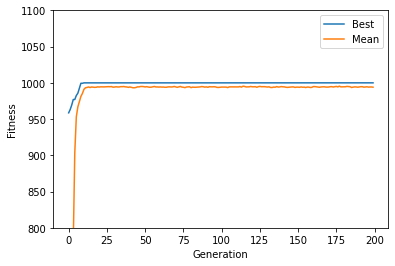

In [7]:
from evolvepy import Evolver

evolver = Evolver(generator, evaluator, 100)

# Optmizes over 200 generations
hist, last_population = evolver.evolve(200) 

# Plot the results
plt.plot(hist.max(axis=1))
plt.plot(hist.mean(axis=1))

plt.legend(["Best", "Mean"])
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.ylim(800,1100)
plt.savefig("Example2-Figure1.jpg")

See how now the best fitness never gets worse? This is the effect of the Elitism! With it, you will never lose the best individual and the solution can only get better as the generations go by.

![Figure1](Example2-Figure1.jpg)